# Linear Discriminant Analysis

This notebook provides a demo of using `scikit-learn`'s linear discriminant analysis function.

In [1]:
# Code adapted from https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

cmap = colors.LinearSegmentedColormap(
    "red_blue_classes",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)
plt.cm.register_cmap(cmap=cmap)

/tmp/ipykernel_29243/2677216172.py:17: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap(cmap=cmap)


# Dataset Generation Functions

In [12]:
def dataset_fixed_cov():
    """Generate 3 Gaussians samples with the same covariance matrix"""
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0.0, -0.23], [0.83, 0.23]])
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C) + np.array([1, 1]),
        np.dot(np.random.randn(n, dim), C) + np.array([2, 2]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n), np.ones(n)*2))
    return X, y


def dataset_cov():
    """Generate 3 Gaussians samples with different covariance matrices"""
    n, dim = 300, 2
    np.random.seed(0)
    C1 = np.array([[0.0, -1.0], [2.5, 0.7]]) * 2.0
    C2 = np.array([[1.0, 0.0], [0.0, 1.0]]) * 2.0
    C3 = np.array([[0.5, 0.5], [0.5, 1.0]]) * 2.0
    X = np.r_[
        np.dot(np.random.randn(n, dim), C1),
        np.dot(np.random.randn(n, dim), C2) + np.array([1, 4]),
        np.dot(np.random.randn(n, dim), C3) + np.array([4, 1]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n), np.ones(n)*2))
    return X, y

# Plot

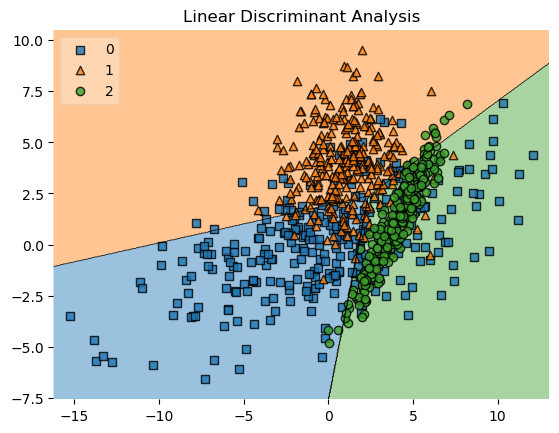

In [16]:
from mlxtend.plotting import plot_decision_regions

X, y = dataset_cov()
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X, y)

fig = plot_decision_regions(X=X, y=y.astype(np.int_), clf=lda, legend=2)
plt.title("Linear Discriminant Analysis")
plt.show()